In [34]:
import pandas as pd 
import numpy as np 
import tensorflow as tf
import os



In [35]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)
tf.config.list_physical_devices('GPU')    

[]

In [36]:
import cv2
import imghdr
data= 'C:/Users/HP/Desktop/Deep_Learning_Projects/classification_CNN' 
data_dir = 'C:/Users/HP/Desktop/Deep_Learning_Projects/classification_CNN' 
image_exts = ['jpeg','jpg', 'bmp', 'png']

for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))

Issue with image C:/Users/HP/Desktop/Deep_Learning_Projects/classification_CNN\data\happy
Issue with image C:/Users/HP/Desktop/Deep_Learning_Projects/classification_CNN\data\sad


In [37]:
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf

data_dir = 'C:/Users/HP/Desktop/Deep_Learning_Projects/classification_CNN'

# Créer un dataset à partir du dossier
data = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    image_size=(224, 224),  # taille à redimensionner
    batch_size=32,          # taille du batch
)
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()

print(batch[0].shape)  # images
print(batch[1].shape)  # labels


Found 305 files belonging to 1 classes.
(32, 224, 224, 3)
(32,)


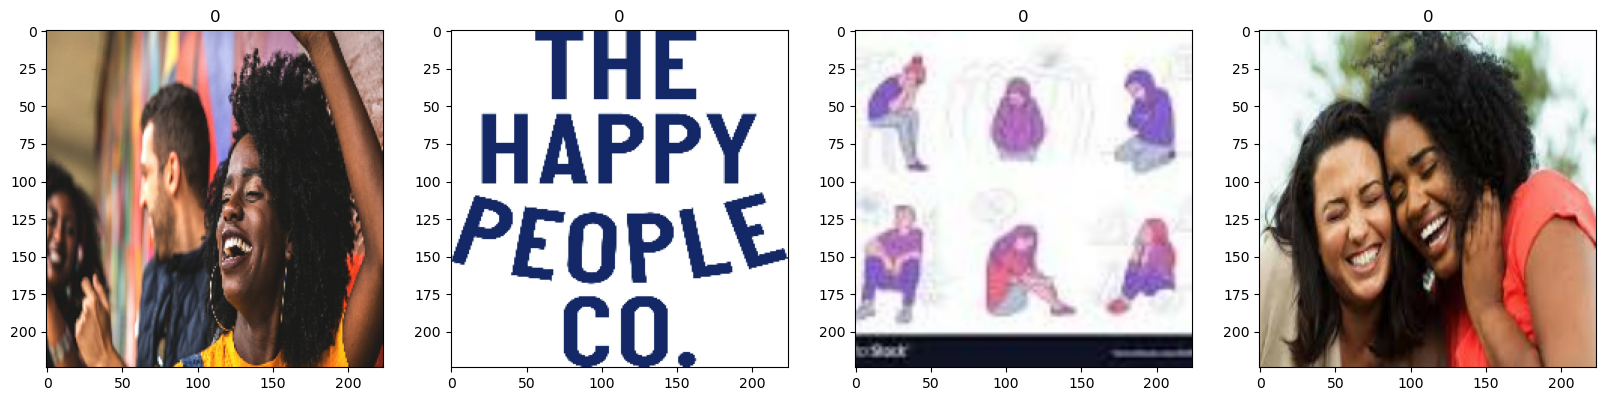

In [38]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [39]:
data = data.map(lambda x,y: (x/255, y))
data.as_numpy_iterator().next()

(array([[[[2.27240901e-02, 1.88025218e-02, 3.11624631e-03],
          [4.99299727e-02, 3.42436992e-02, 2.24789940e-02],
          [6.15896359e-02, 4.98249307e-02, 3.02170869e-02],
          ...,
          [4.31372561e-02, 6.66666701e-02, 6.66666701e-02],
          [4.60080616e-02, 6.16943352e-02, 7.34590441e-02],
          [3.52941193e-02, 5.13308048e-02, 6.30955100e-02]],
 
         [[6.13445416e-02, 4.52030860e-02, 3.34383808e-02],
          [6.01890795e-02, 4.45028059e-02, 3.27380970e-02],
          [6.13795482e-02, 5.05252108e-02, 3.09173651e-02],
          ...,
          [4.31372561e-02, 6.66666701e-02, 6.66666701e-02],
          [4.99296300e-02, 6.56159073e-02, 7.73806125e-02],
          [3.85555290e-02, 5.45922183e-02, 6.63569272e-02]],
 
         [[8.71848762e-02, 6.70236871e-02, 5.54434285e-02],
          [4.99299727e-02, 3.42436992e-02, 2.24789940e-02],
          [4.77709845e-02, 4.61365804e-02, 2.53851544e-02],
          ...,
          [4.52030823e-02, 6.46008328e-02, 6.6666

In [40]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [41]:
train_size

7

In [42]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

model = Sequential()

model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))



In [44]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy']) 

In [45]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

In [46]:
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20


ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "dense_6" is incompatible with the layer: expected axis -1 of input shape to have value 14400, but received input with shape (None, 10816)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None, 224, 224, 3), dtype=float32)
  • training=True
  • mask=None
  • kwargs=<class 'inspect._empty'>

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [47]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

pre = Precision()
re = Recall()
acc = BinaryAccuracy()


for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

print(pre.result(), re.result(), acc.result())

ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "dense_6" is incompatible with the layer: expected axis -1 of input shape to have value 14400, but received input with shape (17, 10816)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(17, 224, 224, 3), dtype=float32)
  • training=False
  • mask=None
  • kwargs=<class 'inspect._empty'>

# Test 

TypeError: Image data of dtype object cannot be converted to float

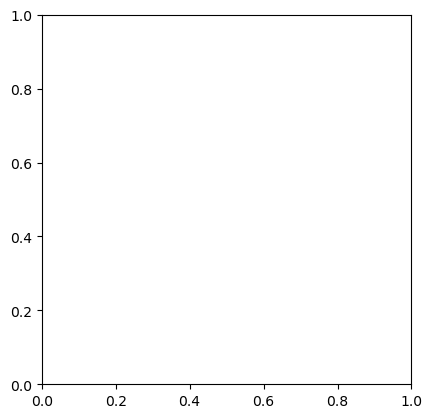

In [48]:
import cv2

img = cv2.imread('154006829.jpg')
plt.imshow(img)
plt.show()


In [49]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

ValueError: Attempt to convert a value (None) with an unsupported type (<class 'NoneType'>) to a Tensor.

In [50]:
yhat = model.predict(np.expand_dims(resize/255, 0))
yhat

if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy') 

NameError: name 'resize' is not defined